In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Loading data and general overview

In [2]:
data_folder = "data"

click_data = pd.read_csv(f"{data_folder}/Clicks.csv", parse_dates=["click_timestamp","registration_date"])
offers_data = pd.read_csv(f"{data_folder}/Offers.csv")
postbacks_data = pd.read_csv(f"{data_folder}/Postbacks.csv", parse_dates=["postback_timestamp"])
sources_data = pd.read_csv(f"{data_folder}/Source.csv")

display(click_data.head())
display(offers_data.head())
display(postbacks_data.head())
display(sources_data.head())

,user_id,click_id,offer_id,source_id,partner,browser,placement,device_type,geo,os,click_number,is_split_offer,click_timestamp,registration_date
0,144264257599918,200986338821580,1.083392e+14,30813769543521,2.335252e+14,Chrome Mobile,top,MOBILE,FR,Android,591,0,2024-10-01 20:48:16,2024-01-04
1,54289169784097,80191043633935,2.055478e+14,205473966316305,1.052342e+14,Wave,other,DESKTOP,US,Windows,21,1,2024-10-01 21:03:28,2023-12-09
2,55499320366337,171674324918689,1.422237e+14,28948219646125,2.894822e+13,Chrome Mobile,interstitial,MOBILE,LV,Android,18,0,2024-10-01 20:48:57,2024-09-23
3,93900209625875,117345394691017,2.523488e+14,75520303016228,7.552030e+13,Chromium Mobile,bottom,MOBILE,AT,Android,2540,0,2024-10-01 20:49:00,2024-09-30
4,37122870576500,58465048649323,5.778412e+13,17526471573325,1.053868e+14,Chromium Mobile,interstitial,MOBILE,ES,Android,6,0,2024-10-01 20:49:41,2024-10-01


,offer_id,payout_type,affiliate_network,daily_cap_amount,total_cap_amount,is_backfill
0,142913016698785,PPL,150066265098611,50.0,NaN,0
1,45516139449060,PPL,150066265098611,50.0,NaN,0
2,106876863872785,PPS,150066265098611,40.0,NaN,0
3,16479728416122,PPL,150066265098611,5.0,NaN,0
4,52028205626427,PPL,150066265098611,30.0,NaN,0


,click_id,offer_id,revenue,postback_timestamp
0,1944536109713,30635717719102,0.03,2024-10-18 17:09:33
1,64822103575831,230701590537978,0.09,2024-10-13 11:50:55
2,200444034598409,274707435099920,0.05,2024-10-05 12:05:29
3,99175274672156,71765294892525,0.09,2024-10-19 09:50:16
4,88772326326384,101043498568515,0.05,2024-10-18 05:34:52


,source_id,network
0,279593647644957,263971225698170
1,27794914753301,87332366395962
2,109647236483577,230005278200733
3,51820170826895,124393588045669
4,151036457625833,43549091994663


In [3]:
click_data.info()
print("\n")
offers_data.info()
print("\n")
postbacks_data.info()
print("\n")
sources_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6060765 entries, 0 to 6060764
Data columns (total 14 columns):
 #   Column             Dtype         
---  ------             -----         
 0   user_id            int64         
 1   click_id           int64         
 2   offer_id           float64       
 3   source_id          int64         
 4   partner            float64       
 5   browser            object        
 6   placement          object        
 7   device_type        object        
 8   geo                object        
 9   os                 object        
 10  click_number       int64         
 11  is_split_offer     int64         
 12  click_timestamp    datetime64[ns]
 13  registration_date  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(5), object(5)
memory usage: 647.4+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74547 entries, 0 to 74546
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------           

In [4]:
click_data.describe(include='all')

,user_id,click_id,offer_id,source_id,partner,browser,placement,device_type,geo,os,click_number,is_split_offer,click_timestamp,registration_date
count,6.060765e+06,6.060765e+06,6.059936e+06,6.060765e+06,6.060750e+06,6060760,6060765,6060765,6060638,6060765,6.060765e+06,6.060765e+06,6060765,6060748
unique,NaN,NaN,NaN,NaN,NaN,137,6,5,228,20,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Chrome Mobile,interstitial,MOBILE,US,Android,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,3942205,2881954,5666915,2394295,5090852,NaN,NaN,NaN,NaN
mean,1.401943e+14,1.407686e+14,1.430698e+14,1.347308e+14,1.352760e+14,NaN,NaN,NaN,NaN,NaN,9.997990e+02,2.012416e-01,2024-10-16 12:36:03.792980224,2024-07-13 19:28:17.847463168
min,3.026846e+08,1.460822e+07,8.751628e+10,4.530533e+09,4.530533e+09,NaN,NaN,NaN,NaN,NaN,1.000000e+00,0.000000e+00,2024-10-01 00:00:03,2016-12-08 00:00:00
25%,7.112187e+13,7.041240e+13,7.442492e+13,7.087799e+13,6.944113e+13,NaN,NaN,NaN,NaN,NaN,4.000000e+00,0.000000e+00,2024-10-08 19:52:30,2024-08-10 00:00:00
50%,1.384155e+14,1.407156e+14,1.422237e+14,1.224495e+14,1.224495e+14,NaN,NaN,NaN,NaN,NaN,2.100000e+01,0.000000e+00,2024-10-16 11:18:18,2024-10-04 00:00:00
75%,2.103084e+14,2.112289e+14,2.120620e+14,2.061084e+14,2.064168e+14,NaN,NaN,NaN,NaN,NaN,1.420000e+02,0.000000e+00,2024-10-24 04:56:46,2024-10-16 00:00:00
max,2.814750e+14,2.814749e+14,2.813652e+14,2.813643e+14,2.813727e+14,NaN,NaN,NaN,NaN,NaN,2.364160e+05,1.000000e+00,2024-10-31 23:59:59,2024-10-31 00:00:00


# 

# Abnormal clicking behaviour

In [5]:
# Number of clicks, offers, and sources per user
clicks_per_user = click_data.groupby('user_id').size().reset_index(name='click_count')
clicks_per_user.describe(include='all')

,user_id,click_count
count,1.085952e+06,1.085952e+06
mean,1.407228e+14,5.581062e+00
std,8.130535e+13,5.735533e+01
min,3.026846e+08,1.000000e+00
25%,7.025382e+13,1.000000e+00
50%,1.406830e+14,2.000000e+00
75%,2.112381e+14,4.000000e+00
max,2.814750e+14,5.039700e+04


In [6]:
# Plot click_count quantiles (1%, 5%, 10%, 25%, 50%, 75%, 90%, 95%, 99%) with actual quantiles
quantiles = clicks_per_user['click_count'].quantile([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99, 0.995,0.996,0.997,0.998,0.999, 1])
print("Quantiles of Click Counts per User:")
print(quantiles)

Quantiles of Click Counts per User:
0.010        1.000
0.050        1.000
0.100        1.000
0.250        1.000
0.500        2.000
0.750        4.000
0.800        5.000
0.850        6.000
0.900        9.000
0.950       17.000
0.990       60.000
0.995       99.000
0.996      116.000
0.997      143.000
0.998      189.000
0.999      293.049
1.000    50397.000
Name: click_count, dtype: float64


In [7]:
# Get only duplicated clicks by id
duplicated_clicks = click_data[click_data.duplicated(['click_id'], keep=False)]
print(f"\nNumber of duplicated clicks: {len(duplicated_clicks)}")
# Print relative
print(f"Relative duplicated clicks: {len(duplicated_clicks) / click_data.shape[0] * 100:.2f}%")


Number of duplicated clicks: 1485969
Relative duplicated clicks: 24.52%


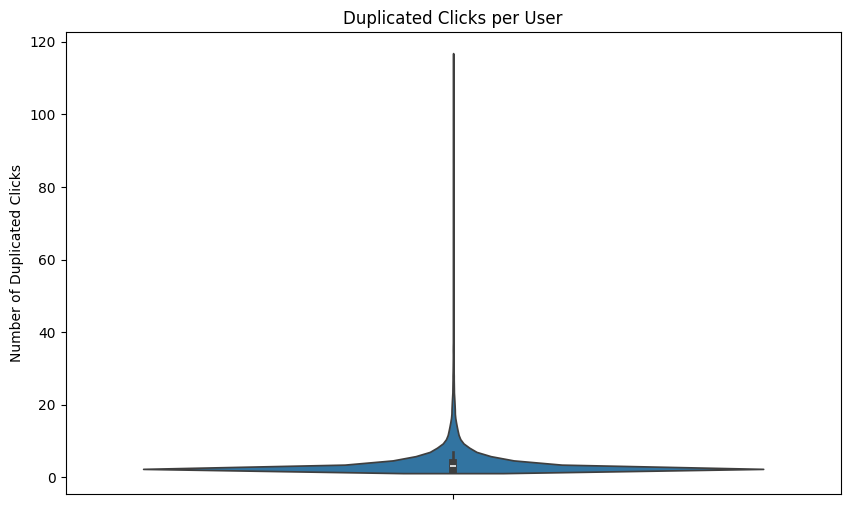

In [8]:
duplicated_data_per_user = duplicated_clicks.groupby('user_id').size()
counts = duplicated_data_per_user.value_counts()

# Get smallest count with 1 duplicated click
smallest_count = counts[counts == 1].index.min()

# Visualize it via violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=duplicated_data_per_user[duplicated_data_per_user <= smallest_count])
plt.title('Duplicated Clicks per User')
plt.ylabel('Number of Duplicated Clicks')
plt.show()

So we potentially have some fraud/bot behaviour.

# Merging check

## 1. Postback

In [9]:
click_offers = set(click_data['offer_id'].unique())
postback_offers = set(postbacks_data['offer_id'].unique())
print(f"Number of unique offers in Clicks: {len(click_offers)}")
print(f"Number of unique offers in Postbacks: {len(postback_offers)}")
print(f"Number of common offers: {len(click_offers & postback_offers)}")
print(f"Number of offers only in Clicks: {len(click_offers - postback_offers)}")
print(f"Number of offers only in Postbacks: {len(postback_offers - click_offers)}")

Number of unique offers in Clicks: 4980
Number of unique offers in Postbacks: 5006
Number of common offers: 4872
Number of offers only in Clicks: 108
Number of offers only in Postbacks: 134


In [ ]:
click_offer_pairs = click_data[['click_id', 'offer_id']].drop_duplicates()
postback_offer_pairs = postbacks_data[['click_id', 'offer_id']].drop_duplicates()

# Common pairs
common_pairs = click_offer_pairs.merge(postback_offer_pairs, on=['click_id', 'offer_id'], how='inner')

# Total unique pairs
total_unique_pairs = pd.concat([click_offer_pairs, postback_offer_pairs]).drop_duplicates()
print(f"Number of common click-offer pairs: {len(common_pairs)} (out of {len(total_unique_pairs)} total unique pairs)")
# Pctg of common pairs
pctg_common_pairs = len(common_pairs) / len(total_unique_pairs) * 100
print(f"Percentage of common click-offer pairs: {pctg_common_pairs:.2f}%")
print(f"Number of click-offer pairs only in Clicks: {len(click_offer_pairs) - len(common_pairs)}")
print(f"Number of click-offer pairs only in Postbacks: {len(postback_offer_pairs) - len(common_pairs)}")

Number of common click-offer pairs: 1447115 (out of 6443318 total unique pairs)
Percentage of common click-offer pairs: 22.46%
Number of click-offer pairs only in Clicks: 4613650
Number of click-offer pairs only in Postbacks: 382553


These 134 only in postbacks are PPS or PPL offers which revenur comes from the previous month, so can be ignored in analysis of the current month.

## 2. Offers

In [11]:
offers_data_offers = set(offers_data['offer_id'].unique())
click_data_offers = set(click_data['offer_id'].unique())
print(f"Number of unique offers in Offers: {len(offers_data_offers)}")
print(f"Number of unique offers in Clicks: {len(click_data_offers)}")
print(f"Number of common offers: {len(offers_data_offers & click_data_offers)}")
print(f"Number of offers only in Offers: {len(offers_data_offers - click_data_offers)}")
print(f"Number of offers only in Clicks: {len(click_data_offers - offers_data_offers)}")

Number of unique offers in Offers: 74547
Number of unique offers in Clicks: 4980
Number of common offers: 4979
Number of offers only in Offers: 69568
Number of offers only in Clicks: 1


There are ~75K offers in total, though only 5K were active at that time.

## 3. Source

In [12]:
sources_data_sources = set(sources_data['source_id'].unique())
click_data_sources = set(click_data['source_id'].unique())
print(f"Number of unique sources in Sources: {len(sources_data_sources)}")
print(f"Number of unique sources in Clicks: {len(click_data_sources)}")
print(f"Number of common sources: {len(sources_data_sources & click_data_sources)}")
print(f"Number of sources only in Sources: {len(sources_data_sources - click_data_sources)}")
print(f"Number of sources only in Clicks: {len(click_data_sources - sources_data_sources)}")

Number of unique sources in Sources: 36914
Number of unique sources in Clicks: 3479
Number of common sources: 3477
Number of sources only in Sources: 33437
Number of sources only in Clicks: 2
